In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [3]:
X = df.drop('price', axis = 1)
y = df.iloc[:, -1]

In [4]:
from sklearn.preprocessing import MinMaxScaler

sx = MinMaxScaler()
sy = MinMaxScaler()

X_scaled = sx.fit_transform(X.values)
y_scaled = sy.fit_transform(y.values.reshape(df.shape[0], 1))

In [5]:
import random

def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]

    w = np.ones(shape = (number_of_features)) 
    bias = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0, total_samples - 1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_pred = np.dot(w, sample_x.T) + bias
    
        w_grad = -(2/total_samples) * (sample_x.T.dot(sample_y - y_pred))
        b_grad = -(2/total_samples) * (sample_y - y_pred)
        
        w = w - learning_rate * w_grad
        bias = bias - learning_rate * b_grad
        
        cost = np.square(sample_y - y_pred)
        
        if i%100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, bias, cost, cost_list, epoch_list

In [6]:
w_sgd, bias_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(
                                                                                    X_scaled,
                                                                                    y_scaled.reshape(y_scaled.shape[0], ),
                                                                                    epochs = 10000)
w_sgd, bias_sgd, cost_sgd

(array([0.70533978, 0.67549576]), -0.2309812781196367, 0.002678294918448195)

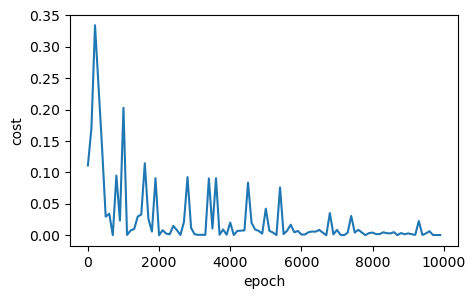

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 3))
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [8]:
def predict(area, bedrooms, w, bias):
    X_scaled = sx.transform([[area, bedrooms]])[0]
    price_scaled = X_scaled[0]* w[0] + X_scaled[1]* w[1] + bias
    price = sy.inverse_transform([[price_scaled]])[0][0]
    return price

In [9]:
predict(2600, 4, w_sgd, bias_sgd)

128.31408268648164